# Name: Mahek Saluja
# USC ID - 8231303227

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt


# Q1

## 1.a) Test and Train split

In [2]:
def load_data():
    data = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
    return data



def train_test_split(data):
    d = data.to_numpy()
    random_index = np.random.permutation(len(data))
    test_index = random_index[:int(len(data)*0.3)]
    train_index = random_index[int(len(data)*0.3):]
    train_data = d[train_index, :]
    test_data = d[test_index, :]
    
    train_x = train_data[:, :-4]
    train_y = train_data[:, -4:-1]
    test_x = test_data[:, :-4]
    test_y = test_data[:, -4:-1]
    return train_x,train_y, test_x,test_y

data = load_data()
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


## 1.b.i)
### Exact match required predicted to be exact match of classified label
### Hamming score consider partial match as well

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.0822451,0.135752,-0.0240166,-0.108351,-0.0776225,-0.0095678,0.057684,0.11868,0.0140384
1,1,0.171534,-0.0989747,0.268425,0.338672,0.268353,0.0608351,-0.222475,-0.207693,0.170883,...,-0.254341,0.0227862,0.16332,0.0120223,-0.090974,-0.0565095,-0.0353034,0.02014,0.082263,0.0290557
2,1,0.152317,-0.0829727,0.287128,0.276014,0.189867,0.00871396,-0.242234,-0.219153,0.232538,...,-0.237384,0.0507907,0.207338,0.0835357,-0.0506914,-0.0235902,-0.0667215,-0.0250832,0.0991084,0.0771624
3,1,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.0981807,0.270375,...,-0.317084,-0.0115674,0.100413,-0.0502237,-0.136009,-0.177037,-0.130498,-0.0547664,-0.0186914,0.0239543
4,1,0.0878169,-0.0683449,0.306967,0.330923,0.249144,0.00688371,-0.265423,-0.1727,0.266434,...,-0.298524,0.0374389,0.219153,0.0628372,-0.0488846,-0.0530735,-0.0885504,-0.0313456,0.10861,0.0792443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1,-0.554504,-0.337717,0.0355335,0.0345113,0.443451,0.0938888,-0.100753,0.037087,0.0810746,...,-0.145668,-0.0593642,0.0242063,-0.000861475,0.0694299,0.0710014,0.0215908,0.0524494,-0.0218603,-0.07986
7191,1,-0.517273,-0.370574,0.0306732,0.068097,0.40289,0.0966279,-0.11646,0.0637271,0.0890339,...,-0.164675,-0.1056,0.0307669,0.00645689,0.0611271,0.0689779,0.0177454,0.0464614,-0.0154185,-0.101892
7192,1,-0.582557,-0.343237,0.0294678,0.0641795,0.385596,0.114905,-0.103317,0.0703695,0.0813168,...,-0.150025,-0.0786146,0.0248615,0.00869591,0.0824742,0.0777707,-0.00968774,0.0278338,-0.000530615,-0.0804253
7193,1,-0.519497,-0.307553,-0.0049215,0.0728654,0.377131,0.0868664,-0.115799,0.056979,0.0893161,...,-0.15312,-0.0753199,0.0229027,0.00192434,0.0517963,0.069073,0.0179635,0.0418034,-0.0279114,-0.0968954


## 1.b.ii) SVM for each label column for raw and standardize data

In [6]:
train_x, train_y, test_x, test_y = train_test_split(data)
#pipeline = make_pipeline(StandardScaler(), SVC(random_state = 1000))
svm_params = {'gamma': np.logspace(-3, 3, 10), 'C': np.logspace(-3, 3, 10)}

In [7]:
for i in range(3):
    
    std_test_x = StandardScaler().fit(test_x).transform(test_x)
    
    tr_tmp_y = train_y[:, i]
    tst_tmp_y = test_y[:, i]
    
    
    svc =     SVC(random_state = 1000)
    stdsvc = make_pipeline(StandardScaler(), SVC(random_state = 1000))
    
    
    gridcv = GridSearchCV(svc, svm_params, cv = 10, n_jobs=-1)
    stdgridcv = GridSearchCV(stdsvc, {'svc__gamma': np.logspace(-3, 3, 10), 'svc__C': np.logspace(-3, 3, 10)}, cv = 10, n_jobs=-1)
    
    
    gridcv.fit(train_x, tr_tmp_y)
    stdgridcv.fit(train_x, tr_tmp_y)
    
    
    best_estimator = gridcv.best_estimator_
    std_best_estimator = stdgridcv.best_estimator_
    
    
    tst_pred_y = best_estimator.predict(test_x)
    std_pred_y = std_best_estimator.predict(std_test_x)
    
    
    tst_acc_score = accuracy_score(tst_tmp_y, tst_pred_y)
    std_tst_acc = accuracy_score(tst_tmp_y, std_pred_y)
    
    
    tst_ham_loss = hamming_loss(tst_tmp_y, tst_pred_y)
    std_ham_loss = hamming_loss(tst_tmp_y, std_pred_y)
    
    
    print("==== Raw Data Best Params ====")
    print(gridcv.best_params_)
    print("==== Raw Data Accuracy Score ====")
    print(tst_acc_score)
    print("==== Hamming Loss ====")
    print(tst_ham_loss)
    
    print("==== Std Data Best Params ====")
    print(stdgridcv.best_params_)
    print("==== Std Data Accuracy Score ====")
    print(std_tst_acc)
    print("==== Std Hamming Loss ====")
    print(std_ham_loss)

==== Raw Data Best Params ====
{'C': 46.41588833612773, 'gamma': 2.154434690031882}
==== Raw Data Accuracy Score ====
0.989805375347544
==== Hamming Loss ====
0.010194624652455977
==== Std Data Best Params ====
{'svc__C': 10.0, 'svc__gamma': 0.021544346900318832}
==== Std Data Accuracy Score ====
0.31510658016682114
==== Std Hamming Loss ====
0.6848934198331789
==== Raw Data Best Params ====
{'C': 46.41588833612773, 'gamma': 2.154434690031882}
==== Raw Data Accuracy Score ====
0.9879518072289156
==== Hamming Loss ====
0.012048192771084338
==== Std Data Best Params ====
{'svc__C': 46.41588833612773, 'svc__gamma': 0.021544346900318832}
==== Std Data Accuracy Score ====
0.5648748841519926
==== Std Hamming Loss ====
0.4351251158480074
==== Raw Data Best Params ====
{'C': 46.41588833612773, 'gamma': 2.154434690031882}
==== Raw Data Accuracy Score ====
0.9870250231696015
==== Hamming Loss ====
0.012974976830398516
==== Std Data Best Params ====
{'svc__C': 46.41588833612773, 'svc__gamma': 0.0

## 1.b.iii) SVM with L-1 penalized

In [8]:
for i in range(3):
    
    std_test_x = StandardScaler().fit(test_x).transform(test_x)
    
    tr_tmp_y = train_y[:, i]
    tst_tmp_y = test_y[:, i]
    
    
    lnrstdsvc = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', dual=False))
    
    lnrstdgridcv = GridSearchCV(lnrstdsvc, {'linearsvc__C': np.logspace(-3, 3, 10)}, cv = 10, n_jobs=-1)
    
    
    lnrstdgridcv.fit(train_x, tr_tmp_y)
    
    
    
    lnr_std_best_estimator = lnrstdgridcv.best_estimator_
    
    
    std_pred_y = lnr_std_best_estimator.predict(std_test_x)
    
    
    std_tst_acc = accuracy_score(tst_tmp_y, std_pred_y)
    
    
    std_ham_loss = hamming_loss(tst_tmp_y, std_pred_y)
    
    
    print("==== Std Data Best Params ====")
    print(lnrstdgridcv.best_params_)
    print("==== Std Data Accuracy Score ====")
    print(std_tst_acc)
    print("==== Std Hamming Loss ====")
    print(std_ham_loss)

==== Std Data Best Params ====
{'linearsvc__C': 0.46415888336127775}
==== Std Data Accuracy Score ====
0.7965708989805376
==== Std Hamming Loss ====
0.20342910101946246
==== Std Data Best Params ====
{'linearsvc__C': 2.154434690031882}
==== Std Data Accuracy Score ====
0.7242817423540315
==== Std Hamming Loss ====
0.27571825764596847
==== Std Data Best Params ====
{'linearsvc__C': 46.41588833612773}
==== Std Data Accuracy Score ====
0.794253938832252
==== Std Hamming Loss ====
0.2057460611677479


# 1.b.iv) SVM with SMOTE

In [9]:
for i in range(3):
    
    std_test_x = StandardScaler().fit(test_x).transform(test_x)
    
    tr_tmp_y = train_y[:, i]
    tst_tmp_y = test_y[:, i]
    
    
    lnrstdsvc = Pipeline([('smote', SMOTE()), ('stdsclr', StandardScaler()), ('lnrsvc', LinearSVC(penalty='l1', dual=False))])
    
    lnrstdgridcv = GridSearchCV(lnrstdsvc, {'lnrsvc__C': np.logspace(-3, 3, 10)}, cv = 10, n_jobs=-1)
    
    
    lnrstdgridcv.fit(train_x, tr_tmp_y)
    
    
    
    lnr_std_best_estimator = lnrstdgridcv.best_estimator_
    
    
    std_pred_y = lnr_std_best_estimator.predict(std_test_x)
    
    
    std_tst_acc = accuracy_score(tst_tmp_y, std_pred_y)
    
    
    std_ham_loss = hamming_loss(tst_tmp_y, std_pred_y)
    
    
    print("==== Std Data Best Params ====")
    print(lnrstdgridcv.best_params_)
    print("==== Std Data Accuracy Score ====")
    print(std_tst_acc)
    print("==== Std Hamming Loss ====")
    print(std_ham_loss)

==== Std Data Best Params ====
{'lnrsvc__C': 1000.0}
==== Std Data Accuracy Score ====
0.49721964782205746
==== Std Hamming Loss ====
0.5027803521779426
==== Std Data Best Params ====
{'lnrsvc__C': 215.44346900318823}
==== Std Data Accuracy Score ====
0.5060240963855421
==== Std Hamming Loss ====
0.4939759036144578
==== Std Data Best Params ====
{'lnrsvc__C': 2.154434690031882}
==== Std Data Accuracy Score ====
0.6260426320667285
==== Std Hamming Loss ====
0.37395736793327156


#### Conclusion on model 

Hamming loss increased after applying SMOTE.

# Q2

## 2.a  K-Mean with silhouettes score

In [10]:
data = load_data().to_numpy()
data_x = data[:, :-4]
data_y = data[:, -4:-1]

In [11]:
k_list = []
hamming_dist = []
for i in range(50):
    score_list = []
    for k in range(2, 51):
        kmean = MiniBatchKMeans(n_clusters = k, random_state=i).fit(data_x)
        y_predict = kmean.predict(data_x)
        score_list.append(silhouette_score(data_x, y_predict))
    k_list.append(np.argmax(score_list) + 2)
    hamming_dist.append(sum(np.min(cdist(data_x, kmean.cluster_centers_, 'hamming'), axis = 1))/data_x.shape[0])

In [31]:
print("======= Avg Hamming Distance ===========")
print(np.average(hamming_dist))
print("======== Std Hamming Distance ==========")
print(np.std(hamming_dist))

======= Avg Hamming Distance ===========
0.9553014088064815
======== Std Hamming Distance ==========
0.0007480247183797832


In [34]:
from collections import Counter
best_k = Counter(k_list).most_common(1)[0][0]
print("====== Best K =========")
print(best_k)

====== Best K =========
4


## 2.b) Determining majority by reading true label

In [35]:
Labels = ['Family', 'Genus', 'Spices']

In [40]:
for i in range(50):
    score_list = []
    kmean = MiniBatchKMeans(n_clusters = best_k, random_state=i).fit(data_x)
    y_predict = kmean.predict(data_x)
    for cluster in range(best_k):
        matched_indices = [k for k,v in enumerate(list(y_predict == cluster)) if v]
        for col in range(3):
            labels = Counter(data_y[:, col][matched_indices]).most_common(1)[0][0]
            print("Loop: ", i, ", Column : ", Labels[col], ", Majority :", labels)
        print("\n")
    print("=========================================")

Loop:  0 , Column :  Family , Majority : Dendrobatidae
Loop:  0 , Column :  Genus , Majority : Ameerega
Loop:  0 , Column :  Spices , Majority : Ameeregatrivittata


Loop:  0 , Column :  Family , Majority : Hylidae
Loop:  0 , Column :  Genus , Majority : Hypsiboas
Loop:  0 , Column :  Spices , Majority : HypsiboasCordobae


Loop:  0 , Column :  Family , Majority : Leptodactylidae
Loop:  0 , Column :  Genus , Majority : Adenomera
Loop:  0 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  0 , Column :  Family , Majority : Leptodactylidae
Loop:  0 , Column :  Genus , Majority : Adenomera
Loop:  0 , Column :  Spices , Majority : AdenomeraAndre


Loop:  1 , Column :  Family , Majority : Leptodactylidae
Loop:  1 , Column :  Genus , Majority : Adenomera
Loop:  1 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  1 , Column :  Family , Majority : Leptodactylidae
Loop:  1 , Column :  Genus , Majority : Adenomera
Loop:  1 , Column :  Spices , Majority : AdenomeraAndre


Loop:  14 , Column :  Family , Majority : Dendrobatidae
Loop:  14 , Column :  Genus , Majority : Ameerega
Loop:  14 , Column :  Spices , Majority : Ameeregatrivittata


Loop:  14 , Column :  Family , Majority : Hylidae
Loop:  14 , Column :  Genus , Majority : Hypsiboas
Loop:  14 , Column :  Spices , Majority : HypsiboasCinerascens


Loop:  14 , Column :  Family , Majority : Leptodactylidae
Loop:  14 , Column :  Genus , Majority : Adenomera
Loop:  14 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  14 , Column :  Family , Majority : Hylidae
Loop:  14 , Column :  Genus , Majority : Hypsiboas
Loop:  14 , Column :  Spices , Majority : HypsiboasCordobae


Loop:  15 , Column :  Family , Majority : Leptodactylidae
Loop:  15 , Column :  Genus , Majority : Adenomera
Loop:  15 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  15 , Column :  Family , Majority : Hylidae
Loop:  15 , Column :  Genus , Majority : Hypsiboas
Loop:  15 , Column :  Spices , Majority : Hypsibo

Loop:  26 , Column :  Family , Majority : Hylidae
Loop:  26 , Column :  Genus , Majority : Hypsiboas
Loop:  26 , Column :  Spices , Majority : HypsiboasCordobae


Loop:  26 , Column :  Family , Majority : Leptodactylidae
Loop:  26 , Column :  Genus , Majority : Adenomera
Loop:  26 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  26 , Column :  Family , Majority : Leptodactylidae
Loop:  26 , Column :  Genus , Majority : Adenomera
Loop:  26 , Column :  Spices , Majority : AdenomeraAndre


Loop:  26 , Column :  Family , Majority : Hylidae
Loop:  26 , Column :  Genus , Majority : Hypsiboas
Loop:  26 , Column :  Spices , Majority : HypsiboasCinerascens


Loop:  27 , Column :  Family , Majority : Hylidae
Loop:  27 , Column :  Genus , Majority : Hypsiboas
Loop:  27 , Column :  Spices , Majority : HypsiboasCordobae


Loop:  27 , Column :  Family , Majority : Leptodactylidae
Loop:  27 , Column :  Genus , Majority : Adenomera
Loop:  27 , Column :  Spices , Majority : AdenomeraHyla

Loop:  38 , Column :  Genus , Majority : Hypsiboas
Loop:  38 , Column :  Spices , Majority : HypsiboasCordobae


Loop:  38 , Column :  Family , Majority : Leptodactylidae
Loop:  38 , Column :  Genus , Majority : Adenomera
Loop:  38 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  38 , Column :  Family , Majority : Dendrobatidae
Loop:  38 , Column :  Genus , Majority : Ameerega
Loop:  38 , Column :  Spices , Majority : Ameeregatrivittata


Loop:  39 , Column :  Family , Majority : Hylidae
Loop:  39 , Column :  Genus , Majority : Hypsiboas
Loop:  39 , Column :  Spices , Majority : HypsiboasCordobae


Loop:  39 , Column :  Family , Majority : Leptodactylidae
Loop:  39 , Column :  Genus , Majority : Adenomera
Loop:  39 , Column :  Spices , Majority : AdenomeraHylaedactylus


Loop:  39 , Column :  Family , Majority : Leptodactylidae
Loop:  39 , Column :  Genus , Majority : Adenomera
Loop:  39 , Column :  Spices , Majority : AdenomeraAndre


Loop:  39 , Column :  Family , Majo

## 2.c) Hamming Distance, Hamming Loss, Hamming Score

In [43]:
hamm_loss = []
hamm_dist = []
for i in range(50):
    kmean = MiniBatchKMeans(n_clusters = best_k, random_state=i).fit(data_x)
    y_predict = kmean.predict(data_x)
    hamm_dist.append(sum(np.min(cdist(data_x, kmean.cluster_centers_, 'hamming'), axis = 1))/data_x.shape[0])
    loss = 0
    for cluster in range(best_k):
        matched_indices = [k for k,v in enumerate(list(y_predict == cluster)) if v]
        tmp_dict = {}
        for col in range(3):
            labels = Counter(data_y[:, col][matched_indices]).most_common(1)[0][0]
            tmp_dict[col] = labels
        for col in range(3):
            loss += sum(data_y[:, col][matched_indices] != tmp_dict[col])
    hamm_loss.append(loss/(data_y.shape[0]*3))

In [44]:
print("=========== Avg hamming loss =========")
print(np.average(hamm_loss))
print("============ Avg hamming score ========")
print(1 - np.average(hamm_loss))
print("============= Avg hamming distance =======")
print(np.average(hamm_dist))

=========== Avg hamming loss =========
0.23716006485985638
============ Avg hamming score ========
0.7628399351401436
============= Avg hamming distance =======
0.9701562954070729


# ISLR 10.7.2

## a)

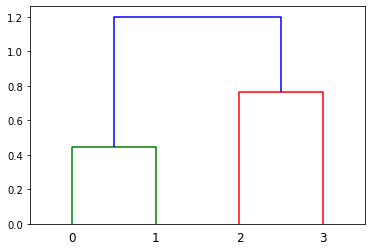

In [45]:
data_matrix = np.array([[0, 0.3, 0.4, 0.7], 
                   [0.3, 0, 0.5, 0.8], 
                   [0.4, 0.5, 0, 0.45], 
                   [0.7, 0.8, 0.45, 0]])

plt.figure()
plot = hierarchy.dendrogram(hierarchy.linkage(data_matrix, 'complete'))

## b)

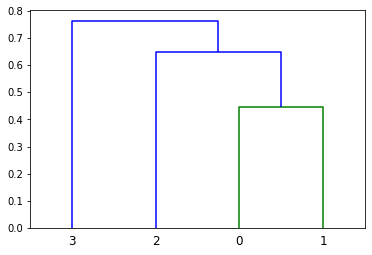

In [46]:
plt.figure()
plot = hierarchy.dendrogram(hierarchy.linkage(data_matrix, 'single'))

## c)
### Clusters are (1, 2) and (3, 4)

## d)
### Clusters are (1, 2, 3) and (4)

## e)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.4472135954999579, 0.4472135954999579, 0.0],
  [0.0, 0.7648529270389177, 0.7648529270389177, 0.0],
  [0.4472135954999579,
   1.2010412149464313,
   1.2010412149464313,
   0.7648529270389177]],
 'ivl': [3, 2, 1, 0],
 'leaves': [0, 1, 2, 3],
 'color_list': ['g', 'r', 'b']}

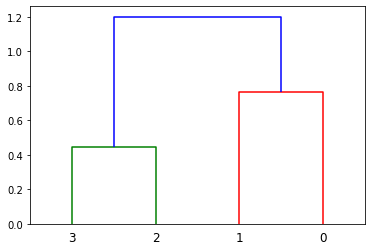

In [30]:
plt.figure()
hierarchy.dendrogram(hierarchy.linkage(data_matrix, 'complete'), labels = [3,2,1,0])